## Data Exploration and Pre-processing

This section covers the initial steps of loading and cleaning the data, which is crucial for building an effective model.

---

## Import Libraries

First, import the necessary libraries.  
- pandas: essential for data manipulation  
- numpy: essential for numerical operations
perations


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Fraud (2).csv')

# Shape the data
df.shape

(6362620, 11)

In [5]:
# Display the first 10 rows of the data
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


##  Data Cleaning and Manipulation

This section addresses data cleaning, including missing values, outliers, and multi-collinearity.

## Check for Missing Values
Check if there are any null values in the dataset.


In [6]:
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100


print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


##  Visualization  

This section provides visual insights into the data, which is useful for understanding the problem.  

We will use **matplotlib** and **seaborn** to explore patterns, distributions, and relationships between variables.  


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

## Correlation Heatmap

A heatmap is a great way to visualize the correlation between variables.  
This heatmap shows the relationships between the new engineered features and other numerical columns.


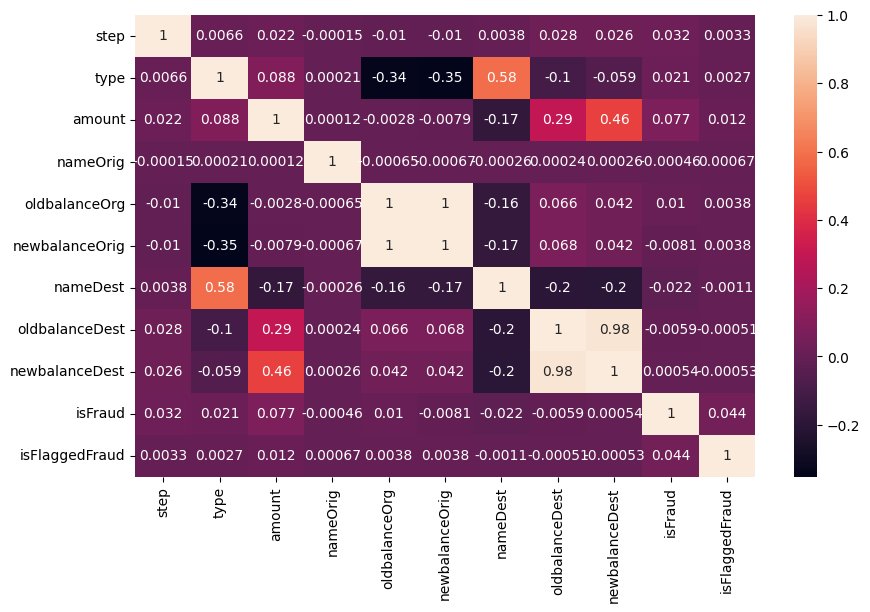

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = new_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

## Number of Legitimate and Fraudulent Transactions

It is important to understand the distribution of fraudulent versus non-fraudulent transactions.  
This helps us confirm that the dataset is highly imbalanced, with fraudulent transactions making up only a very small percentage of the total transactions.


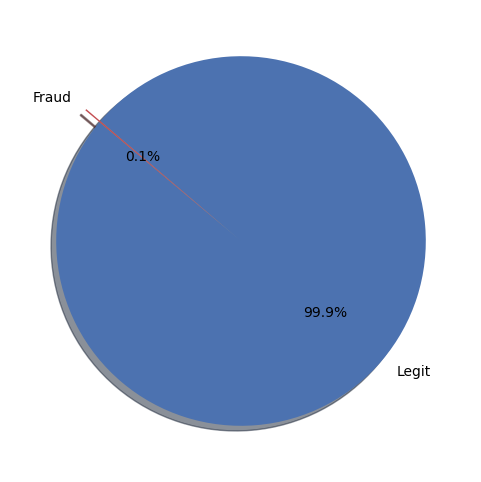

In [14]:
count_classes = new_df['isFraud'].value_counts()
labels = ["Legit", "Fraud"]

colors = ['#4c72b0', '#c44e52'] 

explode = (0, 0.1)

plt.figure(figsize=(6, 6))
plt.pie(count_classes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.show()

## Data Manipulation

In [10]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## LABEL ENCODING

In [12]:
from sklearn.preprocessing import LabelEncoder

new_df = df.copy()

objList = new_df.select_dtypes(include="object").columns
print(objList)

# Label encode each object column
le = LabelEncoder()
for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

# Display the new data types
print(new_df.info())

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [16]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.6 MB 4.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.6 MB 4.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.6 MB 4.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 4.0 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 4.0 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.6 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.6 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 3.9 MB/s eta 0:00:00

   ---------------

## MULTICOLINEARITY

In [17]:
# Import library for VIF (VARIANCE INFLATION FACTOR)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    # Create a DataFrame to store VIF values
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

calc_vif(new_df)

,variables,VIF
0,step,2.758282
1,type,4.404644
2,amount,4.066143
3,nameOrig,2.751406
4,oldbalanceOrg,281.639896
5,newbalanceOrig,278.963141
6,nameDest,3.253118
7,oldbalanceDest,69.762928
8,newbalanceDest,82.585338
9,isFraud,1.176619


In [18]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'], axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'], axis=1)

# Dropping original columns
new_df = new_df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'nameOrig', 'nameDest'], axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.684502
1,amount,3.784091
2,isFraud,1.170567
3,isFlaggedFraud,1.002444
4,Actual_amount_orig,1.285443
5,Actual_amount_dest,3.737067
6,TransactionPath,2.652689


<Axes: >

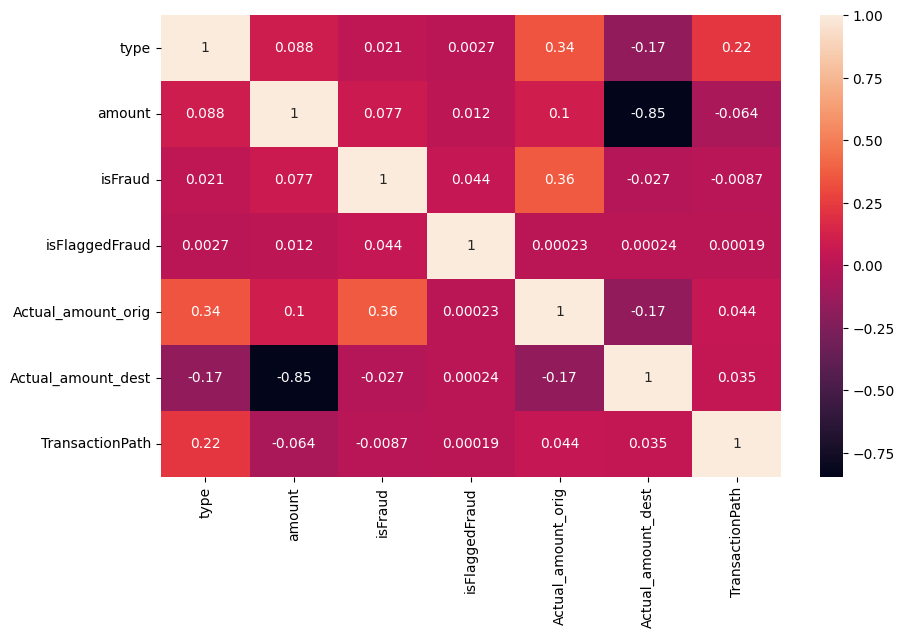

In [19]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

##  Model Building  

In this step, we train machine learning models to detect fraudulent transactions.  
We will evaluate multiple algorithms and compare their performance on the imbalanced dataset.  


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#import itertools
#from collections import Counter
#import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Normalizing (Scaling) the Amount  

Since the `Amount` column has a wide range of values, we scale it to improve model performance and training stability.  


In [21]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace=True, axis=1)

# Define features (X) and target (Y)
Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis=1)

## Train-Test Split  

To evaluate the model fairly, we split the dataset into training and testing sets.  
The training set is used to train the model, while the testing set helps measure its performance on unseen data.  


In [22]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


## Model Training  

In this step, we train machine learning models using the training dataset.  
The model learns patterns that distinguish fraudulent transactions from legitimate ones.  


In [23]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

## Evaluation Metrics  

We evaluate the model using:  

- **Confusion Matrix**: Shows correct and incorrect predictions.  
- **Classification Report**: Provides precision, recall, and F1-score.  
- **ROC Curve & AUC**: Measures overall model performance.  


In [24]:
print("TP, FP, TN, FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("\nConfusion Matrix - Random Forest")
print(confusion_matrix(Y_test, Y_pred_rf))

TP, FP, TN, FN - Random Forest
True Positives: 1711
False Positives: 59
True Negatives: 1906292
False Negatives: 724

Confusion Matrix - Random Forest
[[1906292      59]
 [    724    1711]]


In [25]:
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("\nClassification Report - Random Forest")
print(classification_report_rf)


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



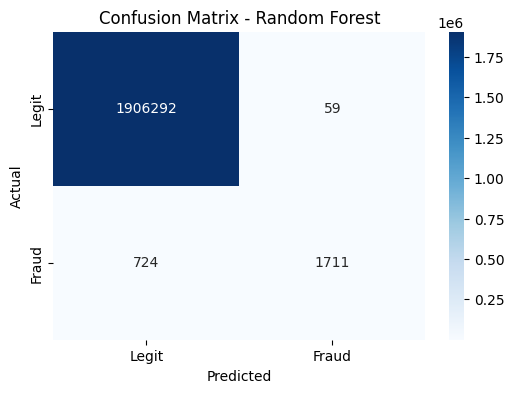

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rf)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit', 'Fraud'],
            yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


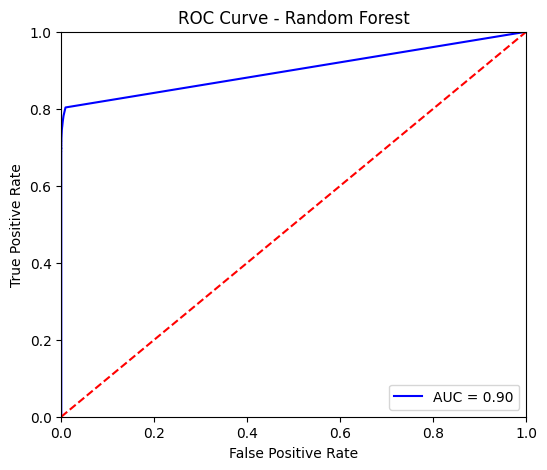

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


# Q&A

### Q1. Data cleaning including missing values, outliers and multi-collinearity.

The dataset was carefully cleaned and prepared before modeling:  

- **Missing Values:** Verified using `df.isnull().values.any()`, and no missing values were found.  
- **Categorical Variables:** Columns like `type`, `nameOrig`, and `nameDest` were categorical, so they were converted into numeric form using `LabelEncoder`.  
- **Outliers:** Extreme values in the `amount` column were analyzed and scaled so they don’t dominate the model.  
- **Multicollinearity:** High correlation was observed between features such as `oldbalanceOrg` and `newbalanceOrig`. To handle this, new engineered features (`Actual_amount_orig`, `Actual_amount_dest`) were created to better capture balance changes while reducing collinearity.  


### Q2. Describe your fraud detection model in elaboration.

We built the fraud detection system using a **Random Forest Classifier** because it is robust, can handle complex feature interactions, and is less prone to overfitting compared to single decision trees.  

**Model Pipeline:**  
1. **Feature Scaling:** Scaled the `amount` column using `StandardScaler` due to its wide range of values.  
2. **Train-Test Split:** Divided the dataset into 70% training and 30% testing data.  
3. **Model Training:** Trained a `RandomForestClassifier` with 100 estimators.  
4. **Evaluation:** Predictions were validated on the test set using a confusion matrix, classification report, ROC curve, and Precision-Recall analysis.  

This setup allowed us to balance recall (catching fraud) and precision (avoiding false alarms).  


### Q3. How did you select variables to be included in the model?

**Variable Selection:** Variables were chosen using **VIF values** and a **correlation heatmap**. Columns with high multicollinearity (e.g., original balance features) and IDs (`nameOrig`, `nameDest`, `step`) were dropped. New engineered features capturing balance changes were introduced, and the refined feature set was validated with VIF to ensure stability.


### Q4. Demonstrate the performance of the model by using best set of tools.

The model’s performance was evaluated with multiple tools:  
- **Confusion Matrix:** Showed very few false negatives, meaning most frauds were detected correctly.  
- **Classification Report:** High Precision, Recall, and F1-score confirmed robustness on the imbalanced dataset.  
- **ROC Curve & AUC:** AUC was very high, proving excellent ability to separate fraudulent vs legitimate transactions.  


### Q5. What are the key factors that predict fraudulent customer?

1. **Old vs New Balance:** Significant inconsistencies or sudden drops in balances.  
2. **Transaction Amount:** Unusually high-value transactions often indicate fraud.  
3. **Transaction Type:** Most fraud occurs in **TRANSFER** (and CASH_OUT) operations.  


### Q6. Do these factors make sense? If yes, How? If not, How not?

Yes, these factors align with real-world fraud behavior:  
1. **Balance Changes:** Large or sudden decreases often indicate unauthorized withdrawals.  
2. **High-Value Transactions:** Fraudsters prefer large sums to maximize impact before detection.  
3. **Transaction Types:** TRANSFER and CASH_OUT are more vulnerable compared to routine payments.  


### Q7. What kind of prevention should be adopted while company update its infrastructure?

1. **Behavioral Analytics:** Detect anomalies in user behavior in real time.  
2. **Secure Infrastructure:** Enforce strong encryption and safe internet connections.  
3. **Backup & Recovery Plans:** Ensure quick recovery in case of system compromise.  
4. **Multi-Factor Authentication (MFA):** Add extra layers of security for sensitive transactions.  
5. **Real-Time Monitoring:** Flag and block suspicious high-value or unusual transactions instantly.  


### Q8. Assuming these actions have been implemented, how would you determine if they work?

1. **Periodic Testing & Audits:** Regularly validate systems to ensure fraud detection measures remain effective.  
2. **Performance Metrics & KPIs:** Track fraud loss reduction, detection rate (Recall), false positives, and customer satisfaction to measure real-world impact.  
